In [2]:
#importing libraries
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
#Importing Data
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

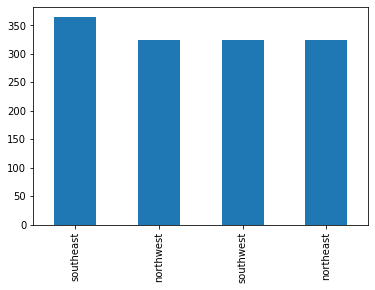

In [7]:
df["region"].value_counts().plot(kind="bar")

In [8]:
df['sexstate']=np.where(df['sex']=='male',1,0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   sexstate  1338 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 78.5+ KB


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sexstate
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [11]:
df['issmoker']= np.where(df['smoker']=='yes',1,0)

In [12]:
df = pd.get_dummies(df,columns=['region'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   charges           1338 non-null   float64
 6   sexstate          1338 non-null   int32  
 7   issmoker          1338 non-null   int32  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), object(2), uint8(4)
memory usage: 78.5+ KB


In [14]:
df.head()

,age,sex,bmi,children,smoker,charges,sexstate,issmoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0,1,0,0


In [15]:
df.drop(['sex', 'smoker'], inplace=True, axis=1)

In [16]:
df.head()

,age,bmi,children,charges,sexstate,issmoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [20]:
columns = [column for column in df.columns if column != 'charges']
columns = ['charges'] + columns
df = df[columns]

In [21]:
df.head()

,charges,age,bmi,children,sexstate,issmoker,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,0,1,0,0,0,1
1,1725.55230,18,33.770,1,1,0,0,0,1,0
2,4449.46200,28,33.000,3,1,0,0,0,1,0
3,21984.47061,33,22.705,0,1,0,0,1,0,0
4,3866.85520,32,28.880,0,1,0,0,1,0,0


In [22]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0, test_size=0.2)

In [30]:
X_train

,age,bmi,children,sexstate,issmoker,region_northeast,region_northwest,region_southeast,region_southwest
621,37,34.100,4,1,1,0,0,0,1
194,18,34.430,0,1,0,0,0,1,0
240,23,36.670,2,0,1,1,0,0,0
1168,32,35.200,2,1,0,0,0,0,1
1192,58,32.395,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
763,27,26.030,0,1,0,1,0,0,0
835,42,35.970,2,1,0,0,0,1,0
1216,40,25.080,0,1,0,0,0,1,0
559,19,35.530,0,1,0,0,1,0,0


In [31]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [38]:
models = {'Linear Regression':LinearRegression(),
         'Support Vector' : SVR(),
         'Decision Tree' : DecisionTreeRegressor(),
         'Random Forest' : RandomForestRegressor() }




def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    #looping through the models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [39]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test )
model_scores

{'Linear Regression': 0.7999876970680433,
 'Support Vector': -0.1038790814451449,
 'Decision Tree': 0.6917931859873239,
 'Random Forest': 0.8786158157742546}

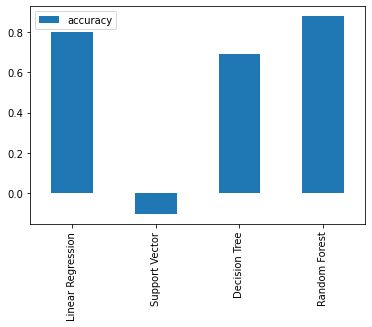

In [41]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();